In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import cv2, glob
import numpy as np
import seaborn as sn
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

sn.set(font_scale = 1.4)

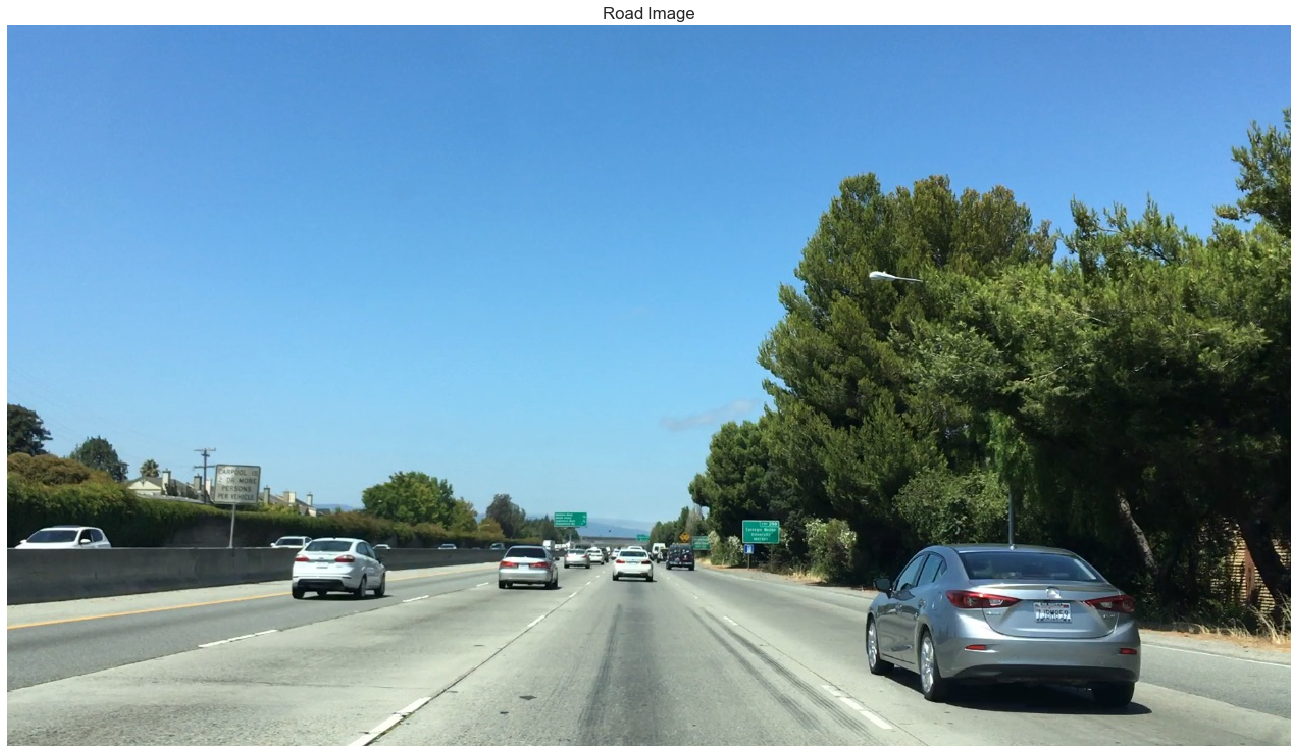

In [3]:
image = mpimg.imread('../Images/road_image.jpg')

plt.figure(figsize = (image.shape[0] // 30, image.shape[1] // 30))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.title('Road Image')
plt.show()

In [4]:
def slide_window(img, x_start_stop = [None, None], y_start_stop = [None, None], xy_window = (64, 64), xy_overlap = (0.5, 0.5)):
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    nx_pix_per_step = np.int(xy_window[0] * (1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1] * (1 - xy_overlap[1]))
    nx_buffer = np.int(xy_window[0] * (xy_overlap[0]))
    ny_buffer = np.int(xy_window[1] * (xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer) / nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer) / ny_pix_per_step) 
    window_list = []
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            startx = xs * nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys * ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            window_list.append(((startx, starty), (endx, endy)))
    return window_list

In [5]:
def draw_boxes(img, bboxes, color = (0, 0, 255), thick = 6):
    imcopy = np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    return imcopy

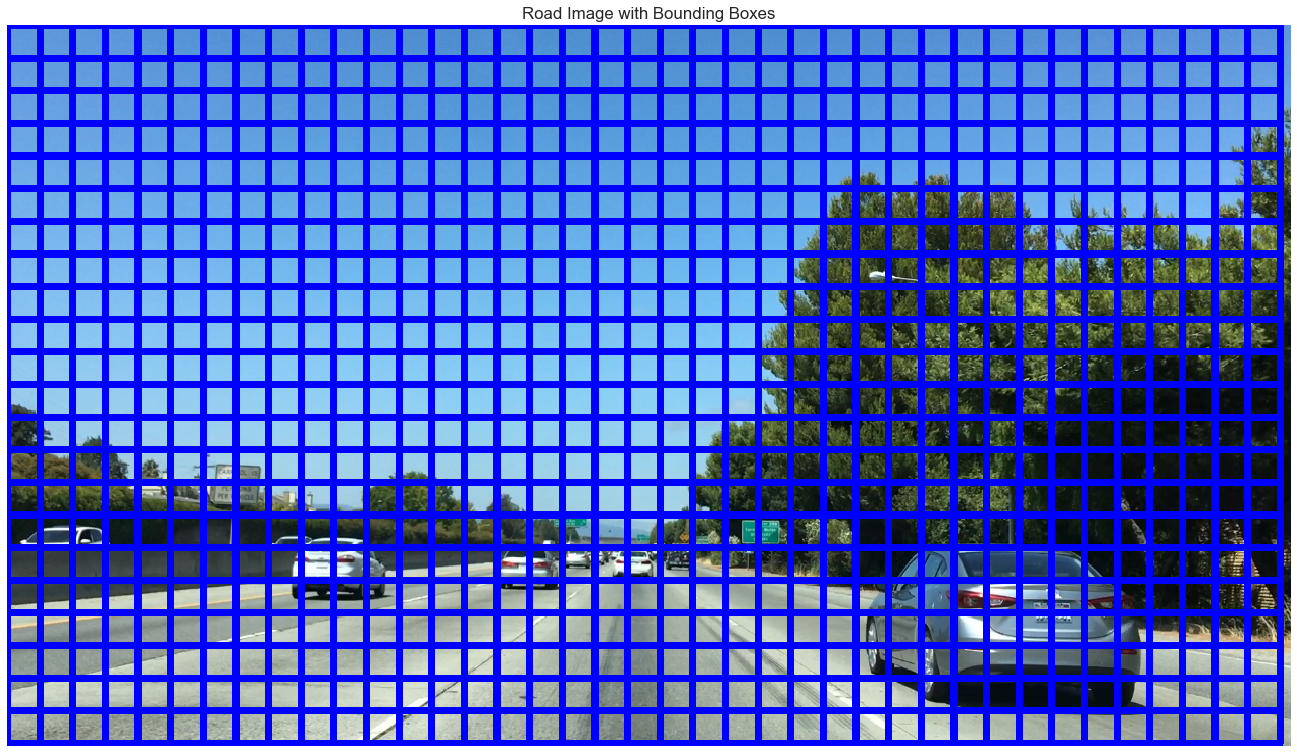

In [6]:
windows = slide_window(image, xy_window = (64, 64), xy_overlap = (0.5, 0.5))
window_img = draw_boxes(image, windows, color = (0, 0, 255), thick = 6)                    

plt.figure(figsize = (image.shape[0] // 30, image.shape[1] // 30))
plt.imshow(window_img)
plt.xticks([])
plt.yticks([])
plt.title('Road Image with Bounding Boxes')
plt.show()